Student Name: Tom Keane

Student ID: 20214537

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from sklearn.model_selection import train_test_split
from copy import copy

## Task 4

<hr style="border:2px solid gray"> </hr>

In [19]:
from sklearn.datasets import make_circles

def circles_setup(n_samples=1000, noise=0.05, plot=True):
    X, y = make_circles(n_samples=1000, noise=0.05)
    y = [yy if yy == 1 else -1 for yy in y]
    if plot == True:
        plot_data_set(X, y)
    return X, y

def plot_data_set(X, y, axis=None):
    if axis is None:
        plt.scatter(X[:,0], X[:,1], c=y)
        plt.xlabel('$x_a$')
        plt.ylabel('$x_b$')
        plt.show()
    else:
        axis.scatter(X[:,0], X[:,1], c=y)
        axis.set_xlabel('$x_a$')
        axis.set_ylabel('$x_b$')

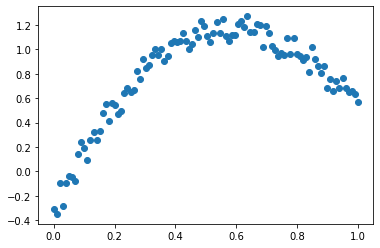

In [20]:
df = pd.read_csv("Task4.csv")
X, y = df["X"].to_numpy(), df["y"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
plt.scatter(X, y)
plt.show()

In [21]:
#HELPER FUNCTIONS
def randomWeight():
    w = np.random.uniform(-0.5, 0.5)
    w = w + 0.1 if w > 0 else w - 0.1
    return w

def add_nthOrder_features(X, n):
    comps = np.empty([len(X), 0])
    for i in np.arange(2, n+1):
        comps = np.c_[comps, X**(i)]
    return np.c_[X, comps]

In [22]:
class LinearClassifier:
    def __init__(self, weights=None, bias=1):
        self.Bias = bias
        self.Weights = weights
        
    def sign_fn(self, w, X):
        X1 = self.prepare_X_for_pseudo_inv_method(X)
        return np.sign( np.dot(X1, w))

    def prepare_X_for_pseudo_inv_method(self, X):
        return np.c_[np.full(len(X), self.Bias), X]

    def fit(self, X, y):
        self.X = X
        self.y = y
        X1 = self.prepare_X_for_pseudo_inv_method(X)
        X1_pseudInv = np.linalg.pinv(X1)
        self.Weights = np.dot(X1_pseudInv, y)

    def predict(self, X):
        return self.sign_fn(self.Weights, X)

    def score(self, X=None, y=None, plot=False, axis=None):
        X = self.X if X is None else X
        y = self.y if y is None else y
        self.y_pred = self.predict(X)
        if plot:
            self.plot_predictions(X, self.y_pred, axis=axis)
        return np.array_equal(self.y_pred, y)/ len(y)
    
    def plot_predictions(self, X, y, axis=None):
        # print(f"features shape   {X.shape}")
        plot_data_set(X, y, axis)
    

class LinearRegressor(LinearClassifier):
    #Aware that in real life a linear regressor is not a child of a classifier. Just wanted to practice python inheritance.
    pass

    def predict(self, X):
        X = self.prepare_X_for_pseudo_inv_method(X).transpose()
        return np.dot(self.Weights, X)    

    def score(self, X=None, y=None, plot=False, axis=None):
        X = self.X if X is None else X
        y = self.y if y is None else y
        y_pred = self.predict(X)
        if plot:
            self.plot_predictions(X, y, axis)
        return np.power(y_pred - y, 2).mean()


In [23]:
def runModel(model, X_train, y_train, X_test, y_test):
    fig, axes = plt.subplots(2, 3, figsize=(20,10))
    fig.suptitle(type(model).__name__)
    for i, axis in zip(np.arange(1,7), axes.flatten()):
        m=copy(model)
        m.fit(add_nthOrder_features(X_train, i), y_train)
        X_n = add_nthOrder_features(X_test, i)
        s = round(m.score(X_n, y_test), 4)
        axis.scatter(X_test, y_test, label='real')
        axis.scatter(X_n[:,0], m.predict(X_n), label='predicted')
        axis.set_title(f"x ... x^{i} order features\nscore {s}")

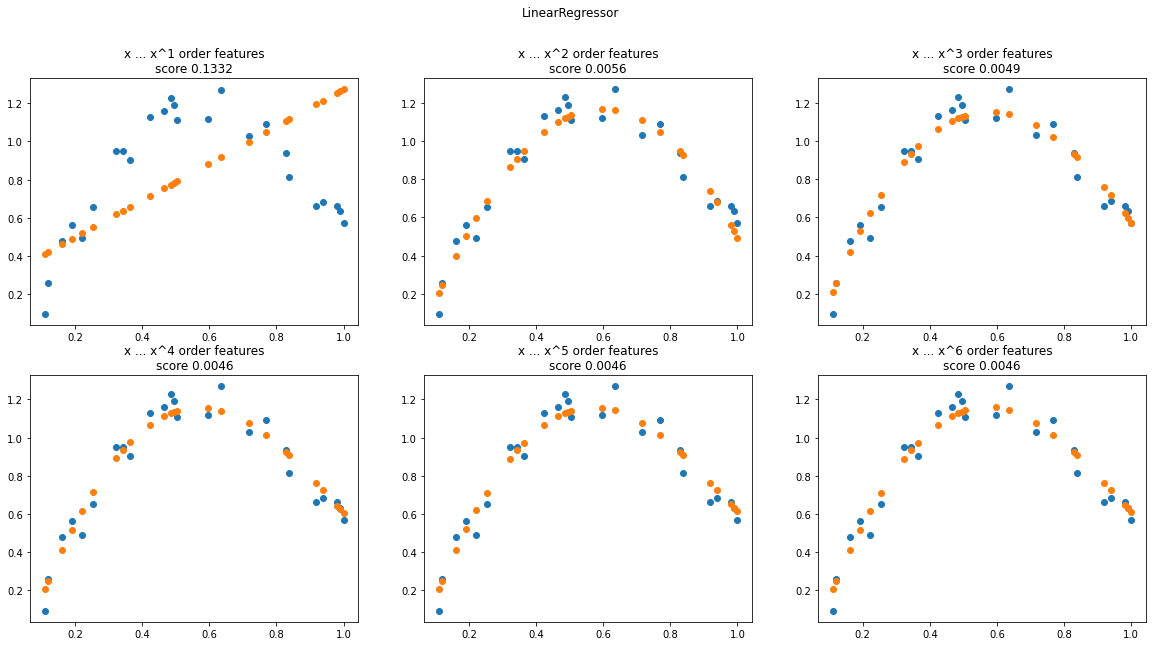

In [24]:
lin_reg = LinearRegressor()

runModel(lin_reg, X_train, y_train, X_test, y_test)

LinearRegressor's score refers to mean squared error.

This has it's strongest performance with 2nd order features, but also performs well with higher dimensions.

## [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
Regression based on k-nearest neighbors.

This implements learning based on the nearest **k** neighbors of each query point, where **k** is an integer value specified by the user.

In [25]:
from sklearn.neighbors import KNeighborsRegressor

KNeighb_reg = KNeighborsRegressor()

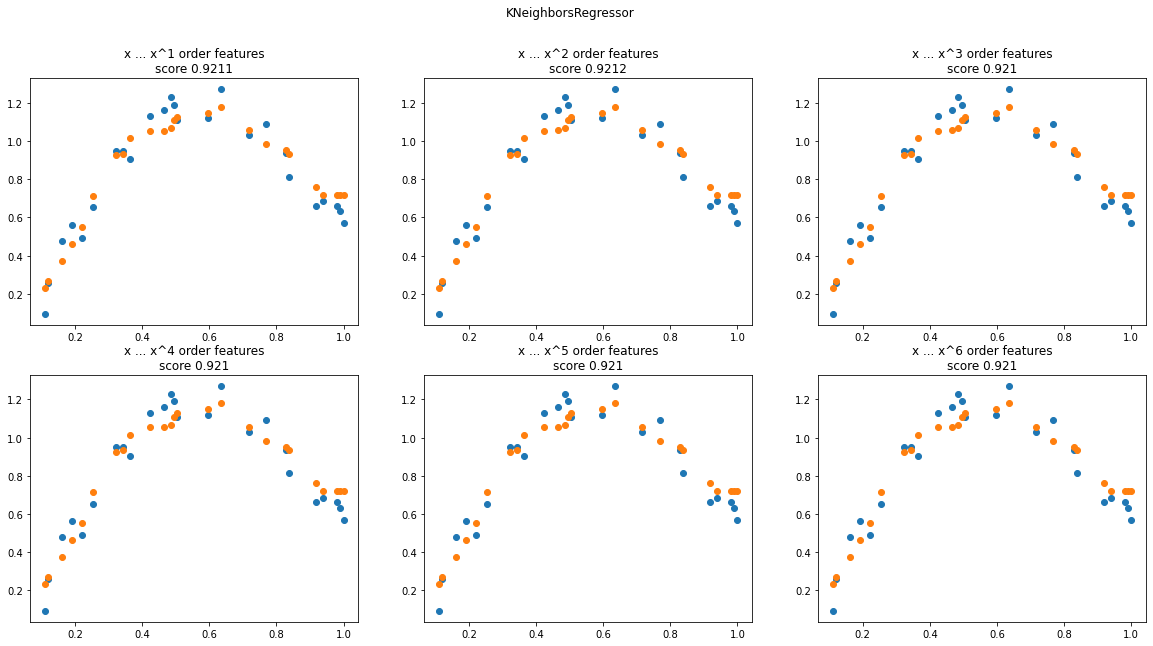

In [26]:
runModel(KNeighb_reg, X_train, y_train, X_test, y_test)

As we can see, the KNeighbours approach works very well with this data-set, and seems to be unaffected by the addition of more features.

## [Passive Aggressive Classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier)

The passive-aggressive algorithms are a family of algorithms for large-scale learning. They are similar to the Perceptron in that they do not require a learning rate. However, contrary to the Perceptron, they include a regularization parameter C.

PassiveAggressiveRegressor can be used with loss='epsilon_insensitive' (PA-I) or loss='squared_epsilon_insensitive' (PA-II).

### Here's a good description of what's going on from [geeksforgeeks](https://www.geeksforgeeks.org/passive-aggressive-classifiers/).

- Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the few **online-learning algorithms**. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step, as opposed to batch learning, where the entire training dataset is used at once.

- This is very **useful in situations where there is a huge amount of data** and it is computationally infeasible to train the entire dataset because of the sheer size of the data.

- We can simply say that an online-learning algorithm will get a training example, update the classifier, and then throw away the example.


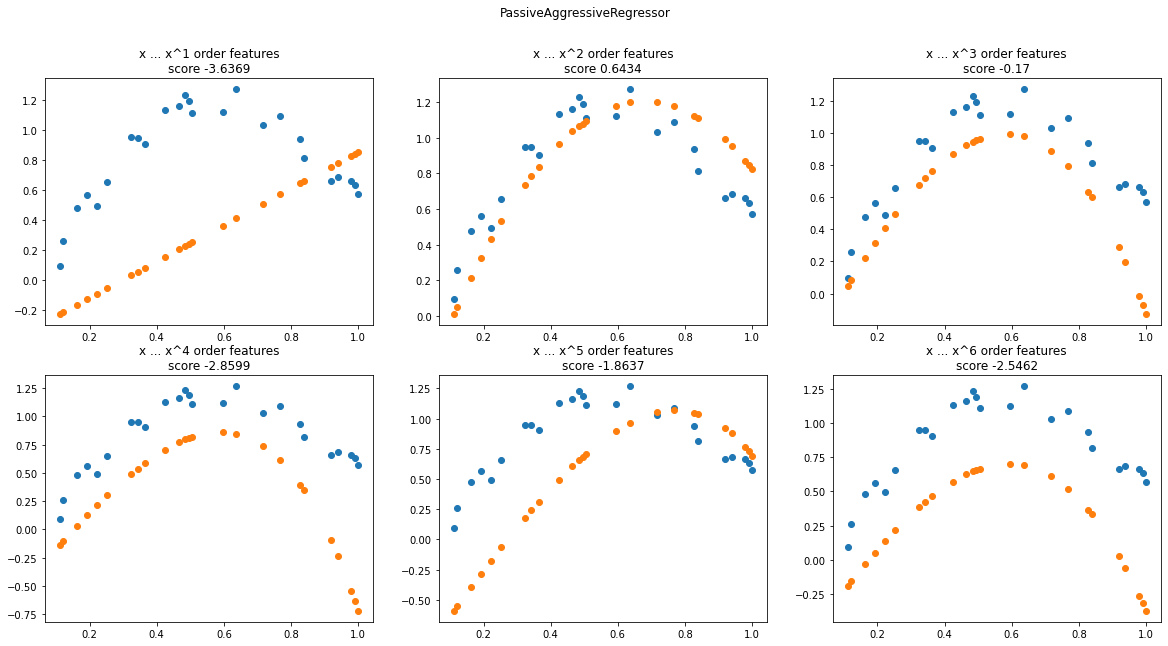

In [27]:
from sklearn.linear_model import PassiveAggressiveRegressor
par = PassiveAggressiveRegressor()

runModel(par, X_train, y_train, X_test, y_test)

conclusion, This performs well with the introduction of a 2nd order feature. The perfomance quickly deteriorates for powers higher than 4.

This may be due to the introduction of further features increases the likelihood of falling into local minima.

This but isn't really built for a small project like this